In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
baseball_salary_data = pd.read_csv("data/baseball_salary.csv")
baseball_salary_data.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,...,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,...,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,...,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,...,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,...,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,...,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [5]:
#対象データ抽出

dataset = baseball_salary_data.loc[:, ['打率', '打点']]

In [9]:
#正規化

## 型違いにるWarning対応
dataset = dataset.astype({'打点': 'float64'})

scaler = MinMaxScaler()
scaler.fit(dataset)
min_max_n_dataset = scaler.transform(dataset)

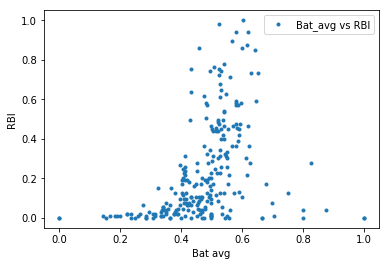

In [8]:
#正規化後グラフ確認

bat_avg_data = min_max_n_dataset[:,0]
rbi_data = min_max_n_dataset[:,1]

fig = plt.figure()
plt.plot(bat_avg_data, rbi_data, '.', label="Bat_avg vs RBI")
plt.legend()
plt.xlabel("Bat avg")
plt.ylabel("RBI")
plt.show()

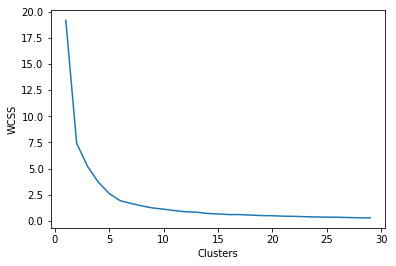

In [10]:
# 最適WCSS値算出

wcss = []
n_comps = np.arange(1, 30)
for k in n_comps:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10)
    km.fit(min_max_n_dataset)
    wcss.append(km.inertia_)

fig = plt.figure()
plt.plot(n_comps, wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

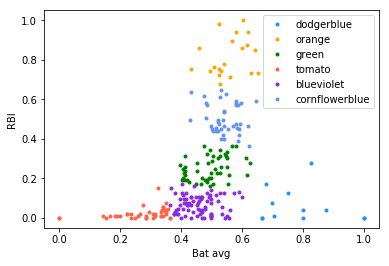

In [11]:
# クラスタリング

n_clusters = 6
colors = ['dodgerblue', 'orange', 'green', 'tomato', 'blueviolet', 'cornflowerblue']

km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
km.fit(min_max_n_dataset)
labels = km.predict(min_max_n_dataset)

for i, lab in enumerate(sorted(set(labels))):
    group = (labels == lab)
    plt.plot(min_max_n_dataset[group,0], min_max_n_dataset[group,1], '.', label=f"{colors[i]}", color=colors[i])
    plt.legend()
plt.xlabel("Bat avg")
plt.ylabel("RBI")
plt.show()